# Submission 1 - ***Baseline***

In [131]:
#SCORE DET BY RMSE

import pandas as pd, \
numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

train=pd.read_csv('datasets/train.csv')
test=pd.read_csv('datasets/test.csv')
#determining SalePrice
train.head(1)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500


In [132]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [133]:
len(train.columns)

81

In [134]:
train['Neighborhood'].nunique()

28

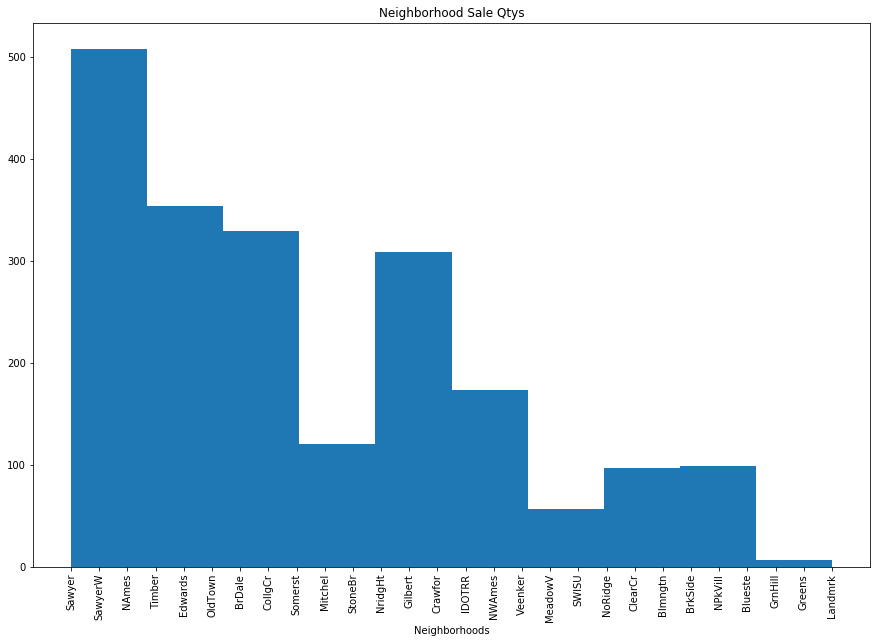

In [135]:
plt.figure(figsize = [15,10])
plt.hist(train['Neighborhood'])
plt.xlabel(xlabel='Neighborhoods')
plt.xticks(rotation='vertical')
plt.title('Neighborhood Sale Qtys');

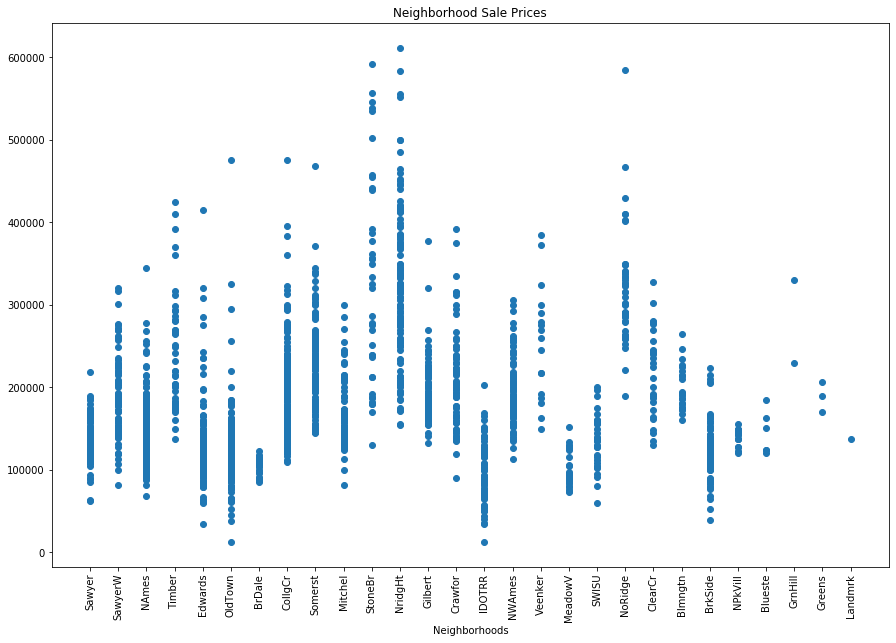

In [136]:
plt.figure(figsize = [15,10])
plt.scatter(train['Neighborhood'],train['SalePrice'] )
plt.xlabel(xlabel='Neighborhoods')
plt.xticks(rotation='vertical')
plt.title('Neighborhood Sale Prices');

In [137]:
train.groupby(train['Neighborhood']).mean().sort_values(['SalePrice'],ascending=False)['SalePrice']

Neighborhood
StoneBr    329675.736842
NridgHt    322831.352459
NoRidge    316294.125000
GrnHill    280000.000000
Veenker    253570.588235
Timber     241051.354167
Somerst    227183.900000
ClearCr    217490.074074
Crawfor    205901.211268
CollgCr    202497.216667
Blmngtn    200417.681818
NWAmes     194619.022989
Gilbert    189228.387931
Greens     188666.666667
SawyerW    187760.160920
Mitchel    167656.707317
NAmes      145905.816129
Blueste    144566.666667
NPkVill    140476.470588
Sawyer     137181.909910
Landmrk    137000.000000
SWISU      134758.875000
Edwards    130493.468531
BrkSide    127022.697368
OldTown    125276.300613
BrDale     103371.052632
IDOTRR     101103.188406
MeadowV    100231.250000
Name: SalePrice, dtype: float64

In [138]:
train.groupby(train['Neighborhood'])['Id'].count()





Neighborhood
Blmngtn     22
Blueste      6
BrDale      19
BrkSide     76
ClearCr     27
CollgCr    180
Crawfor     71
Edwards    143
Gilbert    116
Greens       3
GrnHill      2
IDOTRR      69
Landmrk      1
MeadowV     24
Mitchel     82
NAmes      310
NPkVill     17
NWAmes      87
NoRidge     48
NridgHt    122
OldTown    163
SWISU       32
Sawyer     111
SawyerW     87
Somerst    130
StoneBr     38
Timber      48
Veenker     17
Name: Id, dtype: int64

In [139]:
train['baseline'] = train['SalePrice'].mean()
print(f"{train['baseline'].mean()}")

181469.70160897198


In [140]:
print(f"RMSE: {metrics.mean_squared_error(train['SalePrice'],train['baseline'])**(1/2)}")

RMSE: 79239.33504161824


In [141]:
test['SalePrice'] = train['baseline'].copy()
submission = test[['Id', 'SalePrice']].copy()

In [142]:
submission.to_csv("/Users/christophervolpacchio/GA/project_2/submissions/baseline.csv", index=False)

# Submission 2

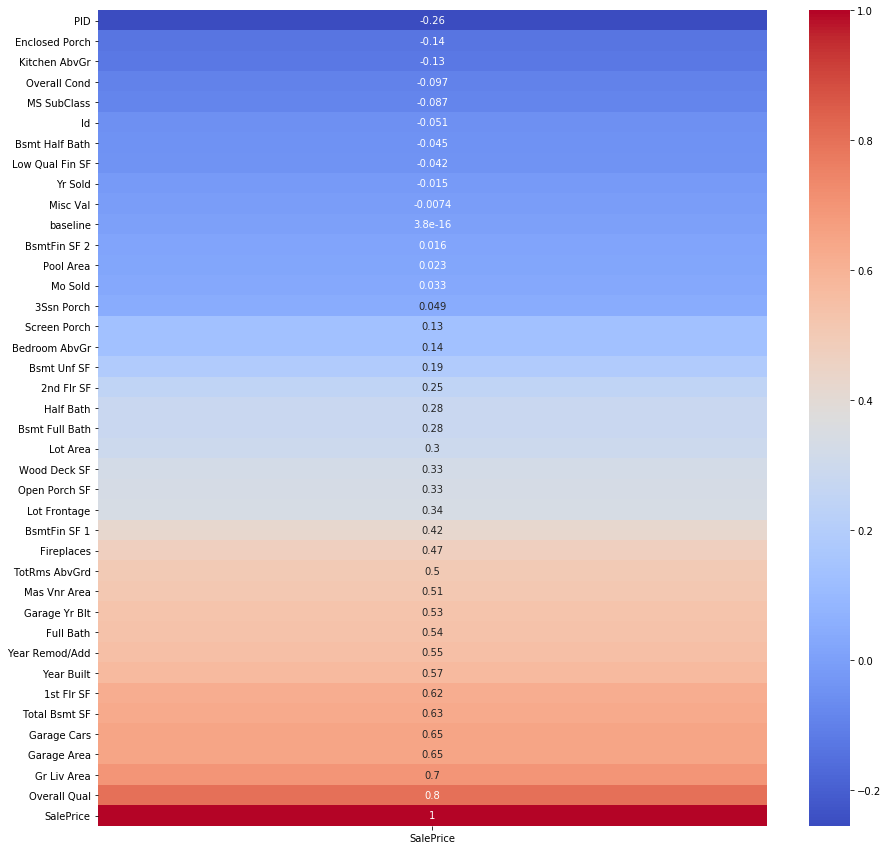

In [143]:
# Running a simple correlation of dependent variables on Sale Price to inform where to start modeling.

plt.figure(figsize=[15,15])
sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice'),cmap='coolwarm',annot=True);

In [144]:
features1=['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars']
train[features1].dtypes

Overall Qual      int64
Gr Liv Area       int64
Garage Area     float64
Garage Cars     float64
dtype: object

In [145]:
train[features1].isnull().sum()

Overall Qual    0
Gr Liv Area     0
Garage Area     1
Garage Cars     1
dtype: int64

In [146]:
# Data cleansing

train['Garage Area'].fillna(0, inplace=True)
train['Garage Cars'].fillna(0, inplace=True)
test['Garage Area'].fillna(0, inplace=True)
test['Garage Cars'].fillna(0, inplace=True)
train[features1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Overall Qual  2051 non-null   int64  
 1   Gr Liv Area   2051 non-null   int64  
 2   Garage Area   2051 non-null   float64
 3   Garage Cars   2051 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 64.2 KB


In [147]:

train['Garage Cars']=train['Garage Cars'].map(lambda x: int(round(x,0)))
train['Garage Area']=train['Garage Area'].map(lambda x: int(round(x,0)))
test['Garage Cars']=test['Garage Cars'].map(lambda x: int(round(x,0)))
test['Garage Area']=test['Garage Area'].map(lambda x: int(round(x,0)))

In [148]:
train[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Overall Qual  2051 non-null   int64
 1   Gr Liv Area   2051 non-null   int64
 2   Garage Area   2051 non-null   int64
 3   Garage Cars   2051 non-null   int64
dtypes: int64(4)
memory usage: 64.2 KB


In [149]:
# Instantiate SLR & run first fit

lr = LinearRegression()

X=train[features1]
y=train['SalePrice']

In [150]:
lr.fit(X,y)
lr.score(X,y)

0.7578979067748626

In [151]:
# Test for over/underfit

lr1=LinearRegression()
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7, random_state=42)
#stratify param to account for sampling issues
    #Aalso worth doing k-folds

In [152]:
lr1.fit(X_train,y_train)
r2_train = lr1.score(X_train,y_train)
r2_test = lr1.score(X_test,y_test)

n1='\n'
print(f"R2 Train: {r2_train}{n1}R2 Test: {r2_test}")

R2 Train: 0.7438853085910293
R2 Test: 0.79164327731246


---

##### With higher R2 in test through hypothesized sampling errors, worth running K-fold cross validation

---

In [153]:
#grid search?

from sklearn.model_selection import cross_val_score

n1='\n'
print(f"Train R2 : {cross_val_score(lr1,X_train, y_train, scoring='r2',cv=40).mean()}{n1}Test R2 : {cross_val_score(lr1,X_test, y_test, scoring='r2',cv=40).mean()}")

Train R2 : 0.7348270366855839
Test R2 : 0.7365012267570805


In [154]:
# First Kaggle submission
y_hat=lr1.predict(X_test)

mse = metrics.mean_squared_error(y_test,y_hat)
rmse = mse**(1/2)
n1='\n'
print(f"MSE: {mse}{n1}RMSE: {rmse}")

MSE: 1245437096.7336216
RMSE: 35290.750866673574


In [155]:
test['SalePrice'] = lr1.predict(test[features1])
submission2=test[['Id', 'SalePrice']]
submission2.head()

,Id,SalePrice
0,2658,190822.396492
1,2718,179768.557798
2,2414,205461.120660
3,1989,127212.961940
4,625,177112.162133


---

###### Do eventually need to regularize due to non-uniform scale of features; not everything is in FT <sup>2</sup>

---

In [156]:
submission2.to_csv("/Users/christophervolpacchio/GA/project_2/submissions/test1.csv", index=False)

# Submission 3

In [157]:
# Intuition would lead me to believe that neighborhoods
# and home styles are major players in saleprice
    #would have to get dummies

In [158]:
new_feats=['Total Bsmt SF', '1st Flr SF']#, 'Neighborhood', 'House Style']
[features1.append(x) for x in new_feats]
features2 = features1
features2
# X=train[features2]
# X.dtypes

['Overall Qual',
 'Gr Liv Area',
 'Garage Area',
 'Garage Cars',
 'Total Bsmt SF',
 '1st Flr SF']

In [159]:
train[features2].isnull().sum()

Overall Qual     0
Gr Liv Area      0
Garage Area      0
Garage Cars      0
Total Bsmt SF    1
1st Flr SF       0
dtype: int64

In [160]:
train['Total Bsmt SF'].fillna(0, inplace=True)
train['Total Bsmt SF']=train['Total Bsmt SF'].map(lambda x: int(round(x,0)))
train[features2].isnull().sum()

Overall Qual     0
Gr Liv Area      0
Garage Area      0
Garage Cars      0
Total Bsmt SF    0
1st Flr SF       0
dtype: int64

In [161]:
pd.get_dummies(train, columns = ['Neighborhood', 'House Style'], drop_first=True)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,0,0,0,0,0,1,0,0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,0,0,0,0,0,1,0,0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,0,0,1,0,0,0,0,0
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,1,0,0,0,0,0,1,0,0
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,1,0,0,1,0,0,0,0,0
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,0,0,0,1,0,0,0,0,0
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,0,0,0,0,0,0,0,0,0
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,0,0,0,1,0,0,0,0,0


In [162]:
lr2 = LinearRegression()

y1=train['SalePrice']
X1=train[features2]

In [163]:
lr2.fit(X1,y1)
print(f"M1 R2 : {lr1.score(X,y)}{n1}M2 R2 : {lr2.score(X1,y1)}")
#y_hat = lr.predict(X)

M1 R2 : 0.7575940631540551
M2 R2 : 0.7788329597709052


In [347]:
test['SalePrice']= lr2.predict(test[features2])
submission3=test[['Id', 'SalePrice']]
submission3.head()

,Id,SalePrice
0,2658,182665.356834
1,2718,210403.302885
2,2414,187477.801132
3,1989,129834.304468
4,625,188638.924950


In [348]:
submission3.to_csv("/Users/christophervolpacchio/GA/project_2/submissions/test2.csv", index=False)

# Submission 4

In [349]:
train['current_age'] = [2020-x for x in train['Year Built']]
train['sell_age'] = train['Yr Sold']-train['Year Built']
train['remodel_age'] = [2020-x for x in train['Year Remod/Add']]
test['current_age'] = [2020-x for x in test['Year Built']]
test['sell_age'] = test['Yr Sold']-test['Year Built']
test['remodel_age'] = [2020-x for x in test['Year Remod/Add']]
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,baseline,current_age,sell_age,remodel_age
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,NaN,0,3,2010,WD,130500,181469.701609,44,34,15
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,NaN,0,4,2009,WD,220000,181469.701609,24,13,23
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,NaN,0,1,2010,WD,109000,181469.701609,67,57,13
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,NaN,0,4,2010,WD,174000,181469.701609,14,4,13
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,NaN,0,3,2010,WD,138500,181469.701609,120,110,27


In [350]:
# Feature Engineering

new_feats = ['current_age','sell_age', 'remodel_age']
[features2.append(x) for x in new_feats]
features3=features2
train[features3].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Overall Qual   2051 non-null   int64
 1   Gr Liv Area    2051 non-null   int64
 2   Garage Area    2051 non-null   int64
 3   Garage Cars    2051 non-null   int64
 4   Total Bsmt SF  2051 non-null   int64
 5   1st Flr SF     2051 non-null   int64
 6   current_age    2051 non-null   int64
 7   sell_age       2051 non-null   int64
 8   remodel_age    2051 non-null   int64
dtypes: int64(9)
memory usage: 144.3 KB


In [351]:
lr3=LinearRegression()

In [352]:
X2=train[features3]
y2=train['SalePrice']

In [353]:
lr3.fit(X2,y2)
print(f"M1 R2 : {lr1.score(X,y)}{n1}M2 R2 : {lr2.score(X1,y1)}{n1}M3 R2 : {lr3.score(X2,y2)}")

M1 R2 : 0.7575940631540551
M2 R2 : 0.7788329597709052
M3 R2 : 0.7907143847647908


---

#### Increased R2 though complexity of model increased as well; will run regression through statsmodels to find p-values within a 95% CI

---

In [356]:
test['SalePrice']= lr3.predict(test[features3])
submission4=test[['Id', 'SalePrice']]
submission4.head()

,Id,SalePrice
0,2658,164213.668353
1,2718,215288.350441
2,2414,197386.717504
3,1989,128461.282119
4,625,178215.226426


In [357]:
submission4.to_csv("/Users/christophervolpacchio/GA/project_2/submissions/test3.csv", index=False)

-----
## Import Statsmodels to find Feature impacts

In [358]:
# split train data again so dont have to replicate feature engineering

In [400]:
# check for statistical significance of features
    # can use zscore() function to standardize variables
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from scipy import stats

b0 = sm.add_constant(X2)
ols = sm.OLS(y2, X2)
ols = ols.fit()
print(ols.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              6431.
Date:                Thu, 09 Jul 2020   Prob (F-statistic):                        0.00
Time:                        22:53:19   Log-Likelihood:                         -24459.
No. Observations:                2051   AIC:                                  4.894e+04
Df Residuals:                    2042   BIC:                                  4.899e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

---

### ***Regularization of features to bring ages and FT <sup>2</sup> to scale***



In [360]:
# Turn our coeff. into Z-scores so that their effects can be measured equally
    #Independent research on multicollinearity between features and engineered ones

In [362]:
features3

['Overall Qual',
 'Gr Liv Area',
 'Garage Area',
 'Garage Cars',
 'Total Bsmt SF',
 '1st Flr SF',
 'current_age',
 'sell_age',
 'remodel_age']

In [363]:
new_feats=['Year Built', 'Year Remod/Add', 'Full Bath', 'Garage Yr Blt', 'Mas Vnr Area', 'TotRms AbvGrd']
[features3.append(x) for x in new_feats]
features4=features3
features4

['Overall Qual',
 'Gr Liv Area',
 'Garage Area',
 'Garage Cars',
 'Total Bsmt SF',
 '1st Flr SF',
 'current_age',
 'sell_age',
 'remodel_age',
 'Year Built',
 'Year Remod/Add',
 'Full Bath',
 'Garage Yr Blt',
 'Mas Vnr Area',
 'TotRms AbvGrd']

In [364]:
train[features4].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Overall Qual    2051 non-null   int64  
 1   Gr Liv Area     2051 non-null   int64  
 2   Garage Area     2051 non-null   int64  
 3   Garage Cars     2051 non-null   int64  
 4   Total Bsmt SF   2051 non-null   int64  
 5   1st Flr SF      2051 non-null   int64  
 6   current_age     2051 non-null   int64  
 7   sell_age        2051 non-null   int64  
 8   remodel_age     2051 non-null   int64  
 9   Year Built      2051 non-null   int64  
 10  Year Remod/Add  2051 non-null   int64  
 11  Full Bath       2051 non-null   int64  
 12  Garage Yr Blt   1937 non-null   float64
 13  Mas Vnr Area    2029 non-null   float64
 14  TotRms AbvGrd   2051 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 240.5 KB


In [365]:
# Cleansing

train['Garage Yr Blt'].fillna(0, inplace=True)
train['Mas Vnr Area'].fillna(0, inplace=True)
test['Garage Yr Blt'].fillna(0, inplace=True)
test['Mas Vnr Area'].fillna(0, inplace=True)

train['Garage Yr Blt']=train['Garage Yr Blt'].map(lambda x: int(round(x,0)))
train['Mas Vnr Area']=train['Mas Vnr Area'].map(lambda x: int(round(x,0)))
test['Garage Yr Blt']=test['Garage Yr Blt'].map(lambda x: int(round(x,0)))
test['Garage Yr Blt']=test['Garage Yr Blt'].map(lambda x: int(round(x,0)))

train[features4].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Overall Qual    2051 non-null   int64
 1   Gr Liv Area     2051 non-null   int64
 2   Garage Area     2051 non-null   int64
 3   Garage Cars     2051 non-null   int64
 4   Total Bsmt SF   2051 non-null   int64
 5   1st Flr SF      2051 non-null   int64
 6   current_age     2051 non-null   int64
 7   sell_age        2051 non-null   int64
 8   remodel_age     2051 non-null   int64
 9   Year Built      2051 non-null   int64
 10  Year Remod/Add  2051 non-null   int64
 11  Full Bath       2051 non-null   int64
 12  Garage Yr Blt   2051 non-null   int64
 13  Mas Vnr Area    2051 non-null   int64
 14  TotRms AbvGrd   2051 non-null   int64
dtypes: int64(15)
memory usage: 240.5 KB


In [424]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

X_scale = train[features4]
y_scale = train['SalePrice']

# Instantiate our PolynomialFeatures object to create all two-way terms.
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Fit and transform our X data.
X_overfit = poly.fit_transform(X_scale, y_scale)

X_train, X_test, y_train, y_test = train_test_split(
    X_overfit,
    y,
    test_size=0.7,
    random_state=42
)

sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [425]:
lr4=LinearRegression()
lr4.fit(Z_train, y_train)
lr4.score(Z_train, y_train)

0.9194889687772927

In [426]:
# Linear Regression run with scaled data

lr4.score(Z_test, y_test)

0.8564854719216468

-----

##### Some element of Variance that can be eliminated through Var-Bias tradeoff (we want our test to perform better). Also worth looking into Adjusted R <sup>2</sup> to better gauge the effect of additional features versus the effect gained from their general presence.

---

In [394]:
X_scale = train[features4]
y_scale = train['SalePrice']

# Instantiate our PolynomialFeatures object to create all two-way terms.
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Fit and transform our X data.
X_overfit = poly.fit_transform(X_scale)

sc = StandardScaler()
Z_train = sc.fit_transform(X_overfit)

lr4=LinearRegression()
lr4.fit(Z_train, y_scale)
lr4.score(Z_train, y_scale)

0.8945292316505834

In [395]:
unstandardized_coefficients = lr4.coef_ * np.sqrt(sc.var_) + sc.mean_

In [397]:
len(unstandardized_coefficients)

90

In [371]:
len(lr4.coef_)/15 #features

9.0

In [372]:
X_sc_tst = test[features4]

# Instantiate our PolynomialFeatures object to create all two-way terms.
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Fit and transform our X data.
X_overfit = poly.fit_transform(X_sc_tst)

sc = StandardScaler()
Z_test = sc.fit_transform(X_overfit)

test['SalePrice'] = lr4.predict(Z_test)

----

### Measure Levels of Multicollinearity Through Variance Inflation Factor and Remove Accordingly

In [373]:
# Source
    # https://etav.github.io/python/vif_factor_python.html#:~:text=The%20Variance%20Inflation%20Factor%20(VIF,if%20it%20were%20fit%20alone.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train[features4].values, i) for i in range(train[features4].shape[1])]
vif["features"] = train[features4].columns
vif

/Users/christophervolpacchio/Documents/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,2.731925,Overall Qual
1,4.898645,Gr Liv Area
2,5.625602,Garage Area
3,6.279476,Garage Cars
4,3.376327,Total Bsmt SF
5,3.478636,1st Flr SF
6,inf,current_age
7,533.316009,sell_age
8,inf,remodel_age
9,inf,Year Built


In [374]:
# drop most 'inf' or infinite VIF's & score, then score compliment
    #'Year Built', 'Year Remod/Add'

In [375]:
features5=features4
[features5.remove(x) for x in ['Year Built', 'Year Remod/Add']]

[None, None]

In [376]:
features5

['Overall Qual',
 'Gr Liv Area',
 'Garage Area',
 'Garage Cars',
 'Total Bsmt SF',
 '1st Flr SF',
 'current_age',
 'sell_age',
 'remodel_age',
 'Full Bath',
 'Garage Yr Blt',
 'Mas Vnr Area',
 'TotRms AbvGrd']

In [377]:
lr_test1 = LinearRegression()
lr_test1.fit(train[features5], train['SalePrice'])
lr_test1.score(train[features5], train['SalePrice'])

0.7993058662862687

In [378]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train[features5].values, i) for i in range(train[features5].shape[1])]
vif["features"] = train[features5].columns
vif

,VIF Factor,features
0,43.675717,Overall Qual
1,45.731235,Gr Liv Area
2,32.625708,Garage Area
3,39.914273,Garage Cars
4,22.037638,Total Bsmt SF
5,33.146042,1st Flr SF
6,981.846501,current_age
7,696.891463,sell_age
8,7.396670,remodel_age
9,18.683945,Full Bath


In [417]:
features6 = features5
[features6.append(x) for x in ['Year Built', 'Year Remod/Add']]
[features6.remove(x) for x in ['current_age', 'sell_age','remodel_age']]
features6

ValueError: list.remove(x): x not in list

In [380]:
lr_test2 = LinearRegression()
lr_test2.fit(train[features4], train['SalePrice'])
lr_test2.score(train[features4], train['SalePrice'])

0.7992653287640772

In [409]:
lr_test2.coef_

array([ 1.92528720e+04,  4.55184847e+01,  3.39368982e+01,  8.89016142e+03,
        1.51444928e+01,  1.67902779e+01, -7.06340732e+03, -9.08426925e+00,
        3.85062625e+01, -4.81630865e+02,  2.26468069e+02,  3.59486447e+02])

In [416]:
# check for decreased levels of multicollinearity

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train[features6].values, i) for i in range(train[features6].shape[1])]
vif["features"] = train[features6].columns
vif

,VIF Factor,features
0,44.467343,Overall Qual
1,48.504722,Gr Liv Area
2,32.618637,Garage Area
3,39.243160,Garage Cars
4,21.908640,Total Bsmt SF
5,33.279629,1st Flr SF
6,17.778241,Full Bath
7,30.150453,Garage Yr Blt
8,1.821304,Mas Vnr Area
9,56.386136,TotRms AbvGrd


In [406]:
X_scale = train[features4]
y_scale = train['SalePrice']

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Fit and transform (scale) our features.
X_overfit = poly.fit_transform(X_scale)

ss = StandardScaler()
Z_train = ss.fit_transform(X_overfit)

lr_scaled=LinearRegression()

lr_scaled.fit(Z_train, y_scale)
#lr_scaled.info()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [407]:
lr_scaled.intercept_

181469.70160897472

---

## ***Interpretation of Z-scores***

#### 

In [415]:
# Now we normalise the data
scalerX = StandardScaler().fit(train[features4])
scalery = StandardScaler().fit(train['SalePrice'].reshape(-1, 1)) # Have to reshape to avoid warnings

normed_X = scalerX.transform(train[features4])
normed_y = scalery.transform(train['SalePrice'].reshape(-1,1)) # Have to reshape to avoid warnings

normed_y = normed_y.ravel() # Turn y back into a vector again

# Check it's worked
print(np.mean(X, axis=0), np.mean(y, axis=0)) # Should be 0s
print(np.std(X, axis=0), np.std(y, axis=0))   # Should be 1s

AttributeError: 'Series' object has no attribute 'reshape'

In [404]:
train[features4].describe().T

,count,mean,std,min,25%,50%,75%,max
Overall Qual,2051.0,6.112140,1.426271,1.0,5.0,6.0,7.0,10.0
Gr Liv Area,2051.0,1499.330083,500.447829,334.0,1129.0,1444.0,1728.5,5642.0
Garage Area,2051.0,473.440761,216.135102,0.0,319.0,480.0,576.0,1418.0
Garage Cars,2051.0,1.775719,0.765357,0.0,1.0,2.0,2.0,5.0
Total Bsmt SF,2051.0,1057.471965,449.908003,0.0,793.0,994.0,1318.5,6110.0
1st Flr SF,2051.0,1164.488055,396.446923,334.0,879.5,1093.0,1405.0,5095.0
Full Bath,2051.0,1.577279,0.549279,0.0,1.0,2.0,2.0,4.0
Garage Yr Blt,2051.0,1868.725987,454.133654,0.0,1957.0,1978.0,2001.0,2207.0
Mas Vnr Area,2051.0,98.626524,174.324690,0.0,0.0,0.0,159.0,1600.0
TotRms AbvGrd,2051.0,6.435885,1.560225,2.0,5.0,6.0,7.0,15.0


In [1]:
# Add function that returns regression with inputs and
# takes difference between regressions with input
# changes

In [96]:
# Measure VIF and multicollinearity of features
    #reduce level and reduce variance

# Evaluate your models!
#     - consider your evaluation metrics
        # how to interpret z-score coeffs post stand.
#     - consider your baseline score
#     - how can your model be used for inference?
#     - why do you believe your model will generalize to new data?
        #ran against test data and minimized variance/overfit. Results were a very similar R2 or level of variance
        #in y driven by the variance in Features

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**SalePrice**|*float*|train|The USD that a listing sold for.|
|**Overall Qual**|*int*|train|Numerical score of total porperty on ten point scale.|
|**Gr Liv Area**|*int*|train|Ground floor living room area of the structure measured in ft <sup>2</sup>.|
|**Garage Area**|*int*|train|Space within garage measured in ft <sup>2</sup>.|
|**Garage Cars**|*int*|train|The number of cars that can be kept in the garage.|
|**Total Bsmt SF**|*int*|train|Space within the structure's basement measured in ft <sup>2</sup>.|
|**1st Floor SF**|*int*|train|Space on the first floor of the structure measured in ft <sup>2</sup>.|
|**current_age**|*int*|train|The current year (2020) - the 'Year Built'.|
|**sell_age**|*int*|train|The current year (2020) - the 'Year Sold'.|
|**remodel_age**|*int*|train|The current year (2020) - the 'Year Remod/Add'.|
|**Year Built**|*int*|train|The year that the structure was constructed.|
|**Year Remod/Add**|*int*|train|The year that additions/modifications were made to the structure.|
|**Full Bath**|*int*|train|The quantity of bathrooms with a shower/tub, toilet and sink.|
|**Mas Vnr Area**|*int*|train|Unclear.|
|**TotRms AbvGrd**|*int*|train|The quantity of rooms that are above the ground level of the structure.|

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64